# Titanic
_Thibaud Perrin_  
_Started: 14/02/2022_

## Imports

In [47]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import os

## Files

In [2]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\gender_submission.csv
./data\test.csv
./data\train.csv


## Loading data
#### Train.csv

In [3]:
train_data = pd.read_csv("./data/train.csv")
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Test.csv

In [4]:
test_data = pd.read_csv("./data/test.csv")
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Data exploration

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
list(train_data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
def filterNan(df):
    df[['Embarked']] = df[['Embarked']].fillna(value='N')
    df[['Age']] = df[['Age']].fillna(value=0.0)
    df[['Cabin']] = df[['Cabin']].fillna(value='C_NaN')
    df[['Fare']] = df[['Fare']].fillna(value=0.0)
    df[df.isna().any(axis=1)]
    return df

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_N', 'Embarked_Q', 'Embarked_S']
Feature:     Pclass, 	 Score: 0.08137
Feature:        Age, 	 Score: 0.25052
Feature:      SibSp, 	 Score: 0.05015
Feature:      Parch, 	 Score: 0.04653
Feature:       Fare, 	 Score: 0.26061
Feature: Sex_female, 	 Score: 0.13522
Feature:   Sex_male, 	 Score: 0.14288
Feature: Embarked_C, 	 Score: 0.01066
Feature: Embarked_N, 	 Score: 0.00010
Feature: Embarked_Q, 	 Score: 0.00757
Feature: Embarked_S, 	 Score: 0.01438


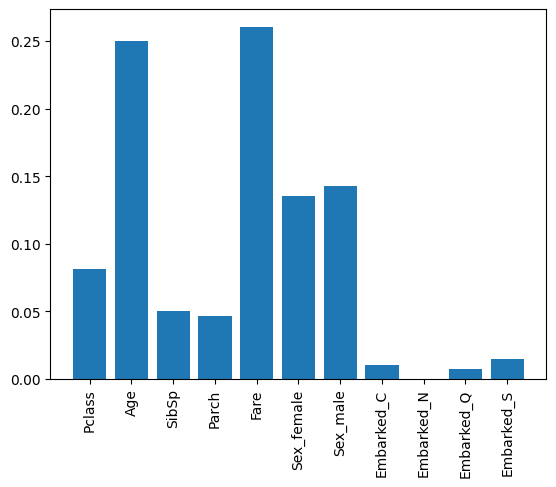

7 most importantes features = 97%
Feature:      Parch, 	 Score: 0.04653
Feature:      SibSp, 	 Score: 0.05015
Feature:     Pclass, 	 Score: 0.08137
Feature:   Sex_male, 	 Score: 0.14288
Feature:        Age, 	 Score: 0.25052
Feature:       Fare, 	 Score: 0.26061
Feature: Sex_female, 	 Score: 0.13522


In [9]:
# define labels
y_i = train_data["Survived"]

# define dataset
features_i = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df_i = filterNan(train_data)
df_i_test = filterNan(test_data)
X_i = pd.get_dummies(df_i[features_i])
X_test_i = pd.get_dummies(df_i_test[features_i])
feature_names = list(X_i.keys())
print(feature_names)

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(X_i, y_i)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %10s, \t Score: %.5f' % (feature_names[i],v))

# plot feature importance
pyplot.xticks(rotation='vertical')
pyplot.bar(feature_names, importance)
pyplot.show()

# Most importance features
n = 7
ind = np.argpartition(importance, -n)[-n:]
print(f"{n} most importantes features = {round(np.sum(importance[ind])*100)}%")
for imp, name in zip(importance[ind], np.array(feature_names)[ind]):
    print('Feature: %10s, \t Score: %.5f' % (name, imp))

## Random Forest

In [57]:
y = train_data["Survived"]
X = train_data

### Split train test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"X_train.shape = {X_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (712, 12)
X_test.shape = (179, 12)
y_train.shape = (712,)
y_test.shape = (179,)


#### Select features

In [59]:
features = ["Pclass", "Sex", "SibSp", "Age", "Fare", "Parch"]

#### Filter Nan

In [60]:
df = filterNan(X_train)
df_test = filterNan(X_test)

In [61]:
X_ = pd.get_dummies(df[features])
X_test = pd.get_dummies(df_test[features])
feature_names = list(X_.keys())

#### Training on train data and predict test data

In [62]:
model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)
model.fit(X_, y_train)
y_pred = model.predict(X_test)

#### Accuracy score

In [63]:
accuracy_score(y_test, y_pred)

0.8324022346368715

#### Full pipline to really evaluate accu

In [79]:
# number of iterations
iter_number = 100
# Data
y = train_data["Survived"]
X = train_data
# features
features = ["Pclass", "Sex", "SibSp", "Age", "Fare", "Parch"]
# accuracy list
accu = np.array([])

In [80]:
for i in range(iter_number):
    # split data in train test subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # remove nan
    df = filterNan(X_train)
    df_test = filterNan(X_test)
    # Convert categorical variable into dummy/indicator variables.
    X_ = pd.get_dummies(df[features])
    X_test = pd.get_dummies(df_test[features])
    # new features names
    feature_names = list(X_.keys())
    # model train and predict
    model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)
    model.fit(X_, y_train)
    y_pred = model.predict(X_test)
    # save accuraccy
    accu = np.append(accu, accuracy_score(y_test, y_pred))
    print(f"{i+1}/{iter_number}", end="\r")
print()

500/500


(array([  2.,  14.,  28.,  60.,  68., 120., 109.,  69.,  27.,   3.]),
 array([0.73743017, 0.75307263, 0.76871508, 0.78435754, 0.8       ,
        0.81564246, 0.83128492, 0.84692737, 0.86256983, 0.87821229,
        0.89385475]),
 <BarContainer object of 10 artists>)

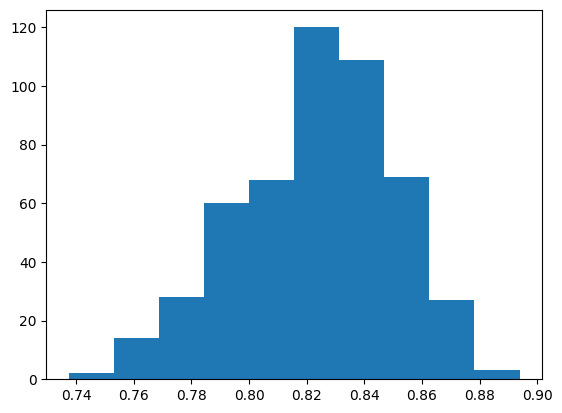

In [81]:
pyplot.hist(accu)

In [82]:
print(f"Mean accuraccy = {np.mean(accu)}")

Mean accuraccy = 0.8230279329608939


We can see that the accuracy is approximately between 0.76 and 0.86 and the average is 0.82

#### Full with global train and test data

In [29]:
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Age", "Fare", "Parch"]
df = filterNan(train_data)
df_test = filterNan(test_data)
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(df_test[features])
feature_names = list(X.keys())

model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Sex': test_data.Sex, 'Survived': predictions})
output.to_csv('./output/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Load Results

In [11]:
output_data = pd.read_csv("./output/submission.csv")
output_data.head()

PassengerId     Sex  Survived
0          892    male         0
1          893  female         0
2          894    male         0
3          895    male         0
4          896  female         0

### Checking output

In [12]:
women = output_data.loc[output_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7960526315789473


In [13]:
men = output_data.loc[output_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.05639097744360902


### Save for submission

In [14]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./output/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Vizualisation

In [15]:
# Extract single tree
estimator = model.estimators_[0]
# Export as dot file
export_graphviz(estimator, 
                out_file='./output/tree.dot', 
                feature_names = list(X_test.keys()),
                class_names = ['Not survived', 'Survived'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [16]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', './output/tree.dot', '-o', './output/tree.png', '-Gdpi=600'])

0

In [17]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = './output/tree.png')

In [18]:
test_data.loc[test_data['PassengerId'] == 892]

PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare  Cabin Embarked  
0  7.8292  C_NaN        Q

In [19]:
X_test2 = pd.get_dummies(test_data[features + ['PassengerId']])
X_test2.loc[X_test2['PassengerId'] == 892]

Pclass  SibSp   Age    Fare  Parch  PassengerId  Sex_female  Sex_male
0       3      0  34.5  7.8292      0          892           0         1

In [20]:
X_train2 = pd.get_dummies(train_data[features + ['PassengerId']])
X_train2.loc[X_train2['PassengerId'] == 2]

Pclass  SibSp   Age     Fare  Parch  PassengerId  Sex_female  Sex_male
1       1      1  38.0  71.2833      0            2           1         0

### Kaggle Score = 0.76076

## New approach

### Load dataset

In [112]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

### Exploring datasets
Printing first 5 rows

In [113]:
print(f"train.shape = {train.shape}")
train.head()

train.shape = (891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [114]:
print(f"test.shape = {test.shape}")
test.head()

test.shape = (418, 11)


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing values:**  
We can see that some features have missings values :
 - Age have 19.87% missing values
 - Cabin have 77.10% missing values
 - Embarked have 0.22 missing values

In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


**Missing values:**  
We can see that some features have missings values :
 - Age have 20.57% missing values
 - Fare have 0.24% missing values
 - Cabin have 78.23% missing values

In [117]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Bar Chart
We will measure the number of survivors inside categorical features, in order to find some patterns.  
_(Pclass / Sex / SibSp / Parch / Cabin / Embarked)_

In [160]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df = df.reindex(sorted(df.columns), axis=1)
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5), title=feature)

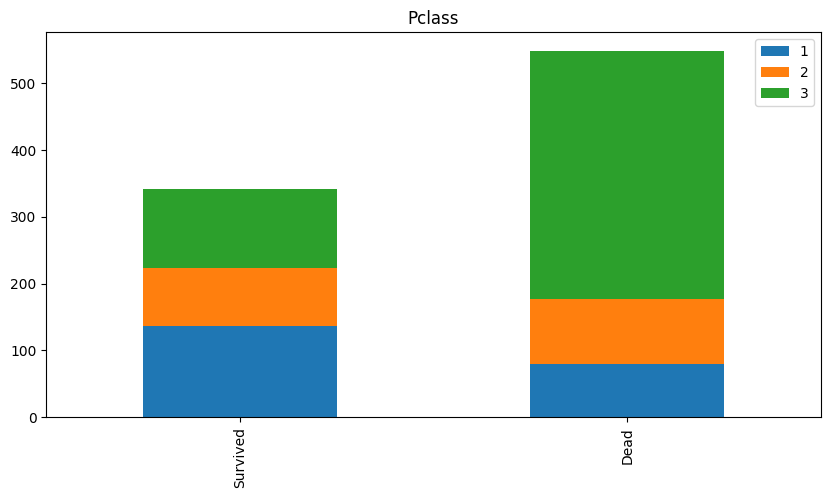

In [161]:
bar_chart('Pclass')

The chart show 1rst class are more likely to survived than other classes and the 3rd class are more likely to died than other classes.

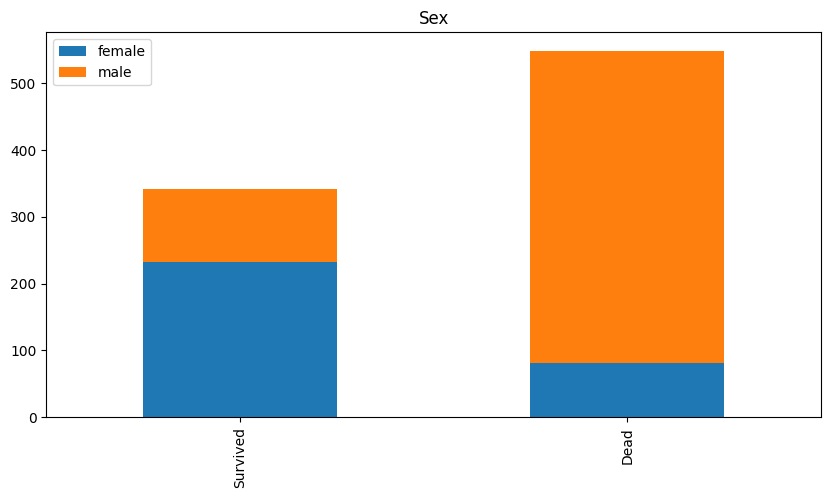

In [162]:
bar_chart('Sex')

The Chart show Women are more likely to survive than men

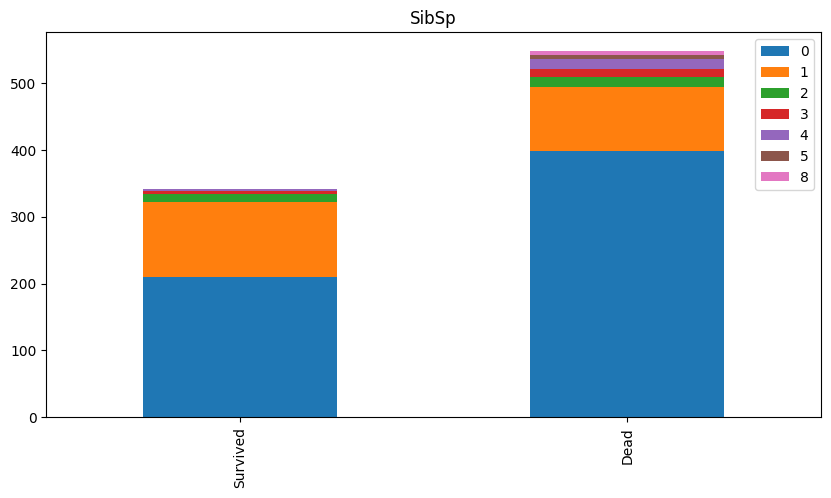

In [163]:
bar_chart('SibSp')

The chart show that person alone are more likely to die than other

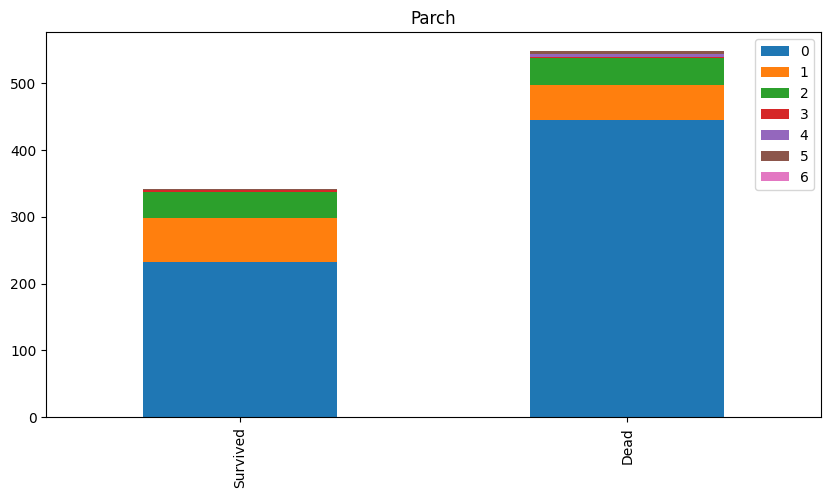

In [164]:
bar_chart('Parch')

This chart show the same thing than the previous chart, person alone are more likely to die than other

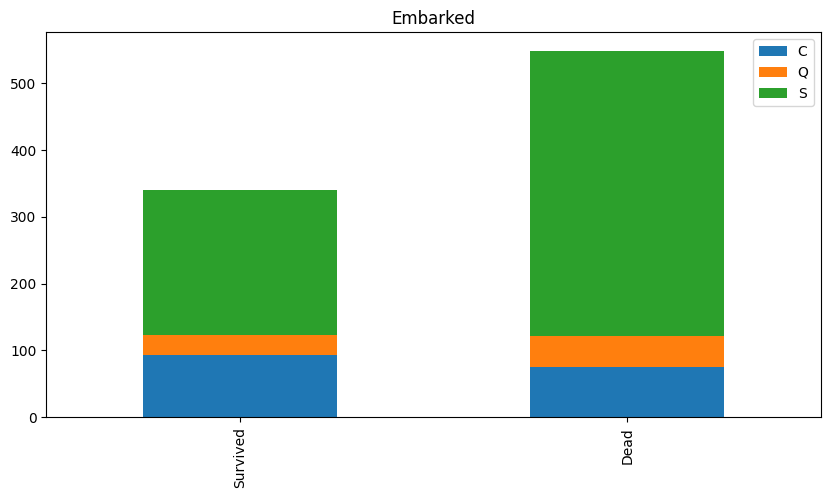

In [165]:
bar_chart('Embarked')

The chart show that person aboarded from C slightly more likely to survived than other, and people from Q are more likely to die than others

## Feature Engineering
#### Name

In [166]:
train_test = [train, test]

In [167]:
for d in train_test:
    d['Qualification'] = d['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [168]:
train['Qualification'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Qualification, dtype: int64

In [169]:
test['Qualification'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Qualification, dtype: int64

**Code of qualifications retained**  
1. Mr: 0
2. Miss: 1
3. Mrs: 2
4. Others: 3

In [170]:
qualification_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2,
    "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,
    "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3
}
for d in train_test:
    d['Qualification'] = d['Qualification'].map(qualification_mapping)

In [171]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Qualification  
0      0         A/5 21171   7.2500   NaN        S              0  
1      0          PC 17599  71.2833   C85        C              2  
2      0  STON/O2. 3101282   7.9250   NaN        S              1  
3      0            113803  53.1000  C123        S              2  
4      0            373450   8.0500   NaN        S              0

In [172]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Qualification  
0  34.5      0      0   330911   7.8292   NaN        Q              0  
1  47.0      1      0   363272   7.0000   NaN        S              2  
2  62.0      0      0   240276   9.6875   NaN        Q              0  
3  27.0      0      0   315154   8.6625   NaN        S              0  
4  22.0      1      1  3101298  12.2875   NaN        S              2

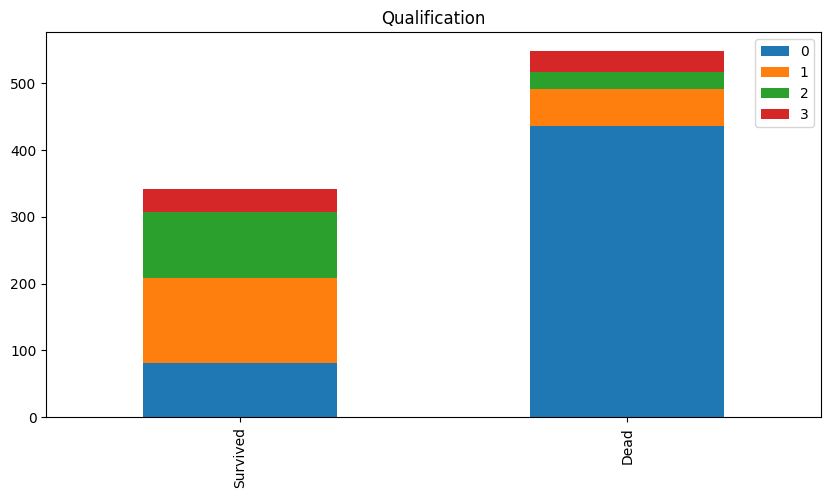

In [173]:
bar_chart('Qualification')

The chart show that Men are more likely to die

##### Cleaning dataset

In [174]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [175]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Qualification  
0         A/5 21171   7.2500   NaN        S              0  
1          PC 17599  71.2833   C85        C              2  
2  STON/O2. 3101282   7.9250   NaN        S              1  
3            113803  53.1000  C123        S              2  
4            373450   8.0500   NaN        S              0

In [176]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Qualification  
0        Q              0  
1        S              2  
2        Q              0  
3        S              0  
4        S              2

#### Sex
male: 0, female: 1

In [178]:
sex_mapping = { "male": 0, "female": 1 }
for d in train_test:
    d['Sex'] = d['Sex'].map(sex_mapping)

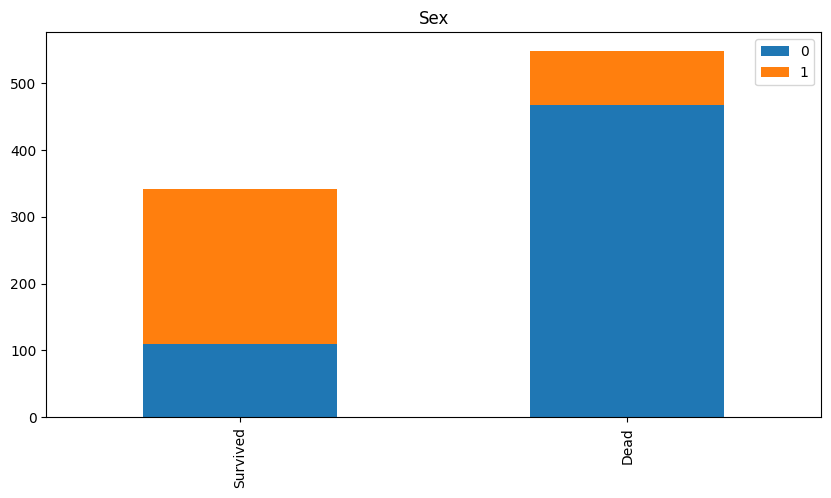

In [179]:
bar_chart('Sex')

#### Age
To fixed missing ages we will replace Nan values by median Age of each Qualifications

In [182]:
train.head(6)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   
5            6         0       3    0   NaN      0      0            330877   

      Fare Cabin Embarked  Qualification  
0   7.2500   NaN        S              0  
1  71.2833   C85        C              2  
2   7.9250   NaN        S              1  
3  53.1000  C123        S              2  
4   8.0500   NaN        S              0  
5   8.4583   NaN        Q              0

In [183]:
train['Age'].fillna(train.groupby('Qualification')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Qualification')['Age'].transform('median'), inplace=True)

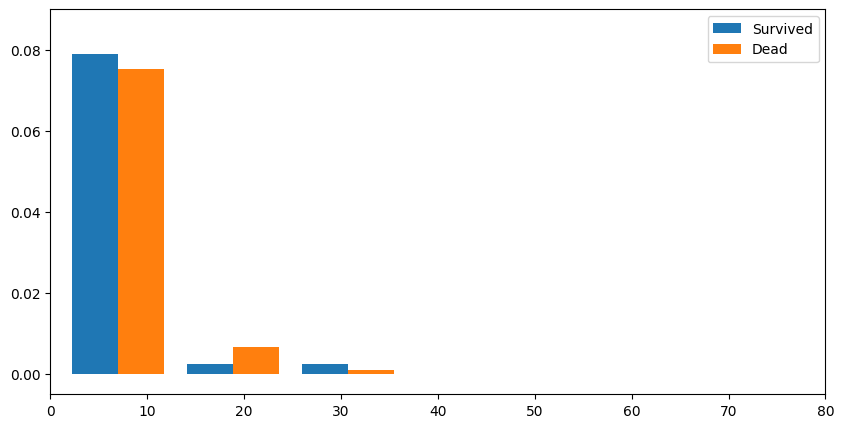

In [220]:
survived = train[train['Survived'] == 1]['Age'].value_counts()
dead = train[train['Survived'] == 0]['Age'].value_counts()
fig, ax = pyplot.subplots(figsize=(10, 5))
ax.hist([survived, dead], histtype='bar', density=True)
ax.set_xlim(0, train['Age'].max())
ax.set_ylim(-0.005, 0.09)
ax.legend(['Survived', 'Dead'])

In [221]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Qualification      0
dtype: int64

In [222]:
test.isnull().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin            327
Embarked           0
Qualification      0
dtype: int64

**We fixed Age Nan**

#### Grouping ages
1. child: 0
2. young: 1
3. adult: 2
4. mid-age: 3
5. senior: 4

In [236]:
len(train['Age'])

891

In [235]:
np.median(train['Age'])

30.0

In [232]:
for d in train_test:
    d.loc[ d['Age'] <= 16, 'Age'] = 0,
    d.loc[(d['Age'] > 16) & (d['Age'] <= 26), 'Age'] = 1,
    d.loc[(d['Age'] > 26) & (d['Age'] <= 36), 'Age'] = 2,
    d.loc[(d['Age'] > 36) & (d['Age'] <= 62), 'Age'] = 3,
    d.loc[ d['Age'] > 62, 'Age'] = 4

ValueError: Must have equal len keys and value when setting with an iterable

In [224]:
train_test

[     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
 0              1         0       3    0  22.0      1      0         A/5 21171   
 1              2         1       1    1  38.0      1      0          PC 17599   
 2              3         1       3    1  26.0      0      0  STON/O2. 3101282   
 3              4         1       1    1  35.0      1      0            113803   
 4              5         0       3    0  35.0      0      0            373450   
 ..           ...       ...     ...  ...   ...    ...    ...               ...   
 886          887         0       2    0  27.0      0      0            211536   
 887          888         1       1    1  19.0      0      0            112053   
 888          889         0       3    1  21.0      1      2        W./C. 6607   
 889          890         1       1    0  26.0      0      0            111369   
 890          891         0       3    0  32.0      0      0            370376   
 
         Fare 